In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
import datetime
from netCDF4 import Dataset


import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
import cartopy.crs as ccrs
import cartopy

import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from orographicPrecipitation.precip_model_functions import qsat,upslope_omega_sin
from orographicPrecipitation.precip_extremes_scaling import *
from wrfProcessing import *

import warnings
from tabulate import tabulate

# Data

In [22]:
temp = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/saved/wrf.mountain.100km.1000d/wrf.mountain.100km.1000d.1.nc_orig")
hgt=temp.HGT.isel(Time=0)

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore",FutureWarning)
    
    Mcont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","wrf.mountain.100km.1000d"  ,"Mountain, control"  ,sel_tropicmountain,open_ds=0)
    Acont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","wrf.aquaplanet.100km.1000d","Aquaplanet, control",sel_tropicmountain,open_ds=0)
    NMcont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","new.wrf.mountain.100km.1000d"  ,"New Mountain, control"  ,sel_tropicmountain,open_ds=1,shifttimes=0)
    

loading time : 0.0 s
Daily precips already computed
precips time : 0.1 s
loading time : 0.0 s
Daily precips already computed
precips time : 0.0 s
loading time : 4.3 s
Daily precips already computed
precips time : 0.1 s


In [27]:
#t=time.time()
#McontU_allt_alllevs = Mcont.vars.u_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#McontV_allt_alllevs = Mcont.vars.v_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#AcontU_allt_alllevs = Acont.vars.u_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#AcontV_allt_alllevs = Acont.vars.v_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#print(time.time()-t)
#McontU_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.u_gr_p_05degmean.nc")
#McontV_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.v_gr_p_05degmean.nc")
#AcontU_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.u_gr_p_05degmean.nc")
#AcontV_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.v_gr_p_05degmean.nc")

In [29]:
#t=time.time()
#McontW_allt_alllevs = Mcont.vars.w_p.sel(south_north=slice(0,4)).isel(time=range(50*Mcont.nhours,len(Mcont.vars.time))).mean(["south_north"]).compute()
#AcontW_allt_alllevs = Acont.vars.w_p.sel(south_north=slice(0,4)).isel(time=range(50*Acont.nhours,len(Acont.vars.time))).mean(["south_north"]).compute()
#print(time.time()-t)
#McontW_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_05degmean.nc")
#AcontW_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_05degmean.nc")


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


205.0585069656372


In [5]:
McontU_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.u_gr_p_05degmean.nc").u_gr_p
McontV_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.v_gr_p_05degmean.nc").v_gr_p
McontW_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_05degmean.nc").w_p

AcontU_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.u_gr_p_05degmean.nc").u_gr_p
AcontV_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.v_gr_p_05degmean.nc").v_gr_p
AcontW_allt_alllevs = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_05degmean.nc").w_p


AcontU_allt_alllevs=AcontU_allt_alllevs.resample(time='6H').mean()
AcontV_allt_alllevs=AcontV_allt_alllevs.resample(time='6H').mean()
AcontW_allt_alllevs=AcontW_allt_alllevs.resample(time='6H').mean()

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
t=time.time()
McontU_alllevs = McontU_allt_alllevs.mean("time")
McontV_alllevs = McontV_allt_alllevs.mean("time")
McontW_alllevs = McontW_allt_alllevs.mean("time")
AcontU_alllevs = AcontU_allt_alllevs.mean("time")
AcontV_alllevs = AcontV_allt_alllevs.mean("time")
AcontW_alllevs = AcontW_allt_alllevs.mean("time")
McontU = McontU_alllevs.sel(level=850.)
McontV = McontV_alllevs.sel(level=850.)
McontW = McontW_alllevs.sel(level=850.)
AcontU = AcontU_alllevs.sel(level=850.)
AcontV = AcontV_alllevs.sel(level=850.)
AcontW = AcontW_alllevs.sel(level=850.)
print(time.time()-t)

0.38824009895324707


In [7]:
McontU_std = McontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontV_std = McontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
McontW_std = McontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontU_std = AcontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontV_std = AcontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
AcontW_std = AcontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')


In [8]:
t=time.time()
NMcontU_allt_alllevs = NMcont.vars.u_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*NMcont.nhours,len(NMcont.vars.time))).mean(["south_north"]).compute()
NMcontV_allt_alllevs = NMcont.vars.v_gr_p.sel(south_north=slice(0,4)).isel(time=range(50*NMcont.nhours,len(NMcont.vars.time))).mean(["south_north"]).compute()
NMcontW_allt_alllevs = NMcont.vars.w_p.sel(south_north=slice(0,4)).isel(time=range(50*NMcont.nhours,len(NMcont.vars.time))).mean(["south_north"]).compute()
print(time.time()-t)

t=time.time()
NMcontU_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/new.wrf.mountain.100km.1000d/diags/new.wrf.mountain.100km.1000d.u_gr_p_05degmean.nc")
NMcontV_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/new.wrf.mountain.100km.1000d/diags/new.wrf.mountain.100km.1000d.v_gr_p_05degmean.nc")
NMcontW_allt_alllevs.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/new.wrf.mountain.100km.1000d/diags/new.wrf.mountain.100km.1000d.w_p_05degmean.nc")
print(time.time()-t)

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


42.18534827232361
1.2476062774658203


In [9]:
NMcontU_allt_alllevs=NMcontU_allt_alllevs.resample(time='6H').mean()
NMcontV_allt_alllevs=NMcontV_allt_alllevs.resample(time='6H').mean()
NMcontW_allt_alllevs=NMcontW_allt_alllevs.resample(time='6H').mean()
t=time.time()
NMcontU_alllevs = NMcontU_allt_alllevs.mean("time")
NMcontV_alllevs = NMcontV_allt_alllevs.mean("time")
NMcontW_alllevs = NMcontW_allt_alllevs.mean("time")

NMcontU = NMcontU_alllevs.sel(level=850.)
NMcontV = NMcontV_alllevs.sel(level=850.)
NMcontW = NMcontW_alllevs.sel(level=850.)

NMcontU_std = NMcontU_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
NMcontV_std = NMcontV_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
NMcontW_std = NMcontW_allt_alllevs.sel(level=850.).rolling(time=400, center=True).mean().dropna("time").std('time')
print(time.time()-t)

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


2.894461154937744


# Precipitation maps

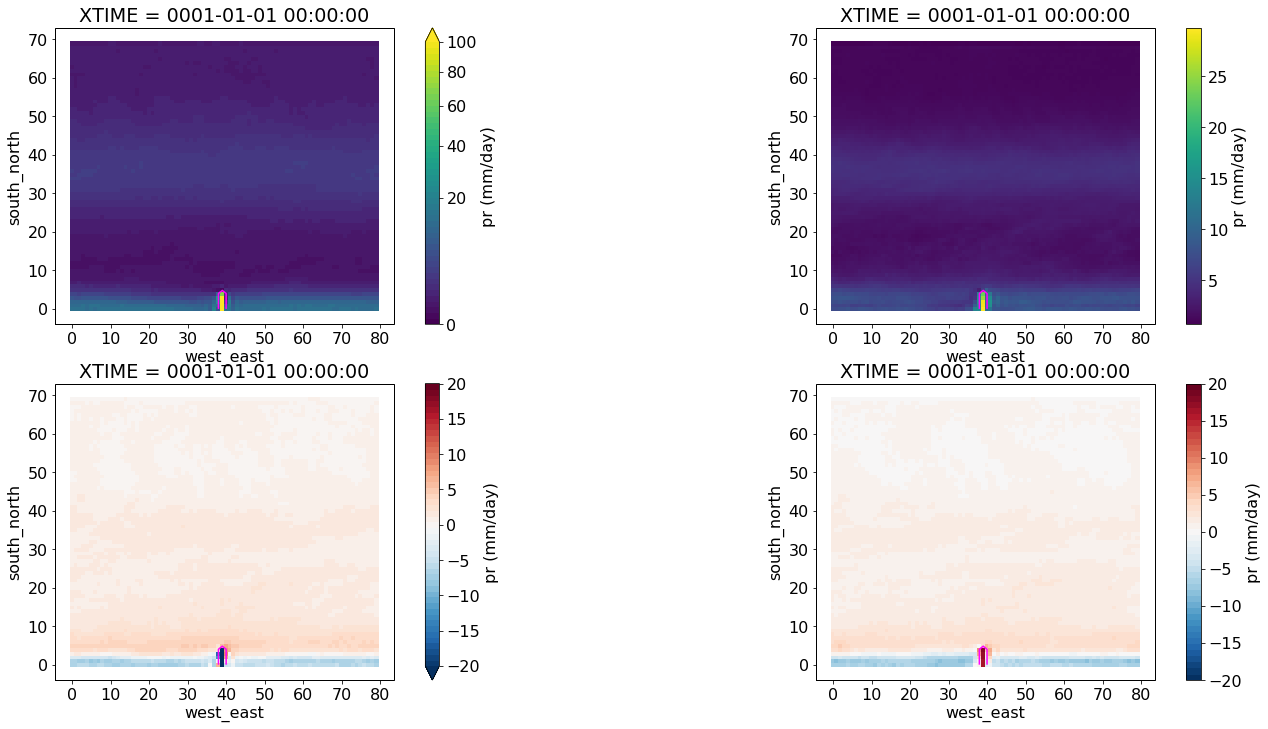

In [24]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(25,12),subplot_kw={'projection': ccrs.PlateCarree()})


Mcont.precip_daily.mean("time").plot(ax=ax1,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)","ticks":np.arange(0.,101.,20.)},levels=np.linspace(0,10.)**2)
NMcont.precip_daily.mean("time").plot(ax=ax2,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)"})#,levels=np.linspace(0,10.,50)**2)#,"ticks":np.arange(-0.02,0.021,0.004)})

(NMcont.precip_daily-Mcont.precip_daily).mean("time").plot(ax=ax3,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)","ticks":np.arange(-20.,21.,5.)},levels=np.linspace(-20,20))
(NMcont.precip_daily-Acont.precip_daily).mean("time").plot(ax=ax4,transform=ccrs.PlateCarree(),cbar_kwargs={"label":"pr (mm/day)","ticks":np.arange(-20.,21.,5.)},levels=np.linspace(-20,20))

ax1.set_title("Control mountain simulation mean precipitation",fontsize=20)
ax2.set_title("New Control mountain simulation mean precipitation",fontsize=20)
ax3.set_title("New Control mountain minus Control mountain" ,fontsize=20)
ax4.set_title("New Control mountain minus Aquaplanet" ,fontsize=20)

for a in (ax1,ax2,ax3,ax4):
    a.set_xticks(range(0,81,10))
    a.set_yticks(range(0,71,10))
    hgt.plot.contour(ax=a,transform=ccrs.PlateCarree(),**{'levels':[200.],'colors':['magenta']})
None

# Longitude plots

## Mean

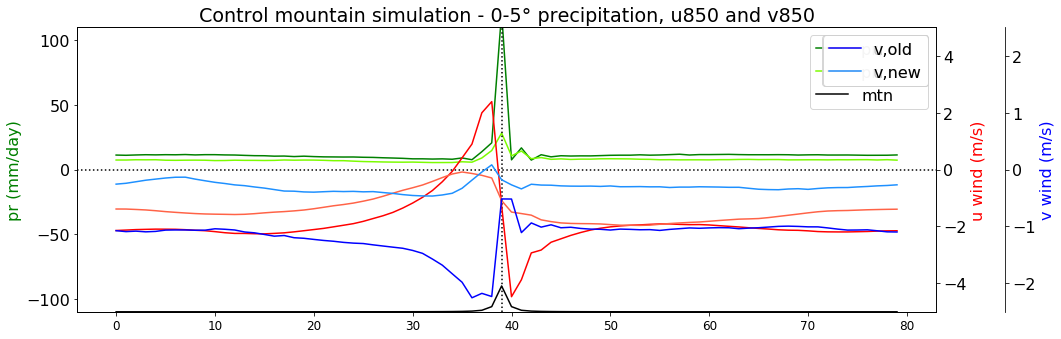

In [26]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain simulation - 0-5° precipitation, u850 and v850')

ax.plot(Mcont.precip_daily.west_east,Mcont.precip_daily.sel(south_north=slice(0,4)).mean(["time","south_north"]),'g',label='pr, old')
ax.plot(NMcont.precip_daily.west_east,NMcont.precip_daily.sel(south_north=slice(0,4)).mean(["time","south_north"]),color='lawngreen',label='pr, new')
ax.plot(hgt.west_east,hgt.sel(south_north=slice(0,4)).mean(["south_north"])/50-110,color='k',label='mtn')
ax.axvline(39,linestyle=':',color='k')

ax.set_ylabel('pr (mm/day)',color="g")
ax.set_ylim(-110.,110.)
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax.twinx()
ax2.plot(McontU.west_east,McontU,'r',label="u,old")
ax2.plot(NMcontU.west_east,NMcontU,color='tomato',label="u,new")
ax2.set_ylabel('u wind (m/s)', color='r') #;ax2.set_ylim(25,30)
ax2.set_ylim(-5.,5.)
    
ax3=ax.twinx()
ax3.plot(McontV.west_east,McontV,'b',label="v,old")
ax3.plot(NMcontV.west_east,NMcontV,color='dodgerblue',label="v,new")
ax3.spines["right"].set_position(("axes", 1.08))
ax3.set_ylabel('v wind (m/s)', color='b')
ax3.set_ylim(-2.5,2.5)

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
for a in (ax,ax2,ax3):
    a.legend()

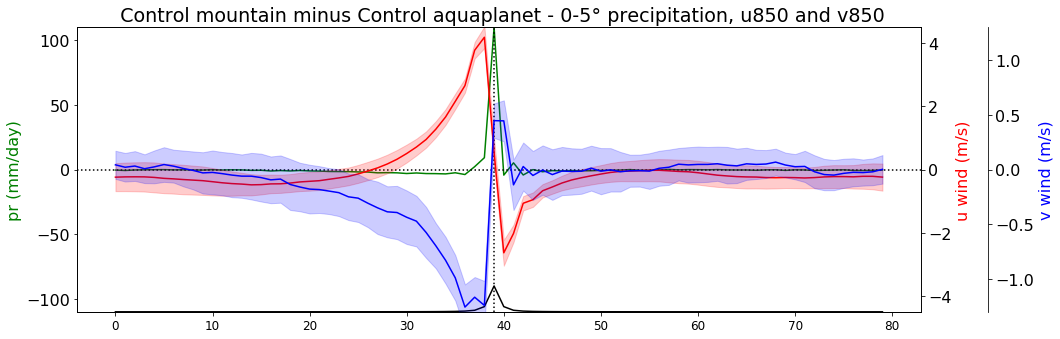

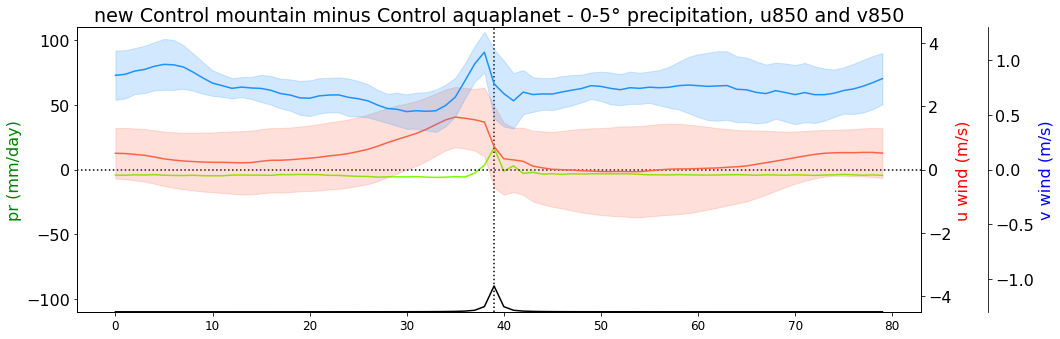

In [27]:
def plot_shades(M,A,colors,new=0):
    Mcont,McontU,McontV,McontU_std,McontV_std=M
    Acont,AcontU,AcontV,AcontU_std,AcontV_std=A
    r,g,b=colors
    if new:
        st="new"
    else:
        st=""  
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.set_title(st+' Control mountain minus Control aquaplanet - 0-5° precipitation, u850 and v850')
    
    ax.plot(Mcont.precip_daily.west_east,(Mcont.precip_daily-Acont.precip_daily).sel(south_north=slice(0,4)).mean(["time","south_north"]),g,label='pr')
    ax.set_ylabel('pr (mm/day)',color='g')
    ax.set_ylim(-110.,110.)
    ax.axhline(0.,linestyle=':',color='k')
    ax.plot(hgt.west_east,hgt.sel(south_north=slice(0,4)).mean(["south_north"])/50-110,color='k',label='mtn')
    ax.axvline(39,linestyle=':',color='k')

      
    ax2=ax.twinx()
    ax2.plot(McontU.west_east,McontU-AcontU,r)
    ax2.fill_between(McontU.west_east, McontU-AcontU-McontU_std, McontU-AcontU+McontU_std,
                     facecolor=r,
                     color=r,   
                     alpha=0.2)    
    ax2.set_ylabel('u wind (m/s)', color='r')
    ax2.set_ylim(-4.5,4.5)
        
    ax3=ax.twinx()
    ax3.plot(McontV.west_east,McontV-AcontV,b)
    ax3.fill_between(McontV.west_east, McontV-AcontV-McontV_std, McontV-AcontV+McontV_std,
                     facecolor=b,
                     color=b,   
                     alpha=0.2)  
    ax3.spines["right"].set_position(("axes", 1.08))
    ax3.set_ylabel('v wind (m/s)', color='b')
    ax3.set_ylim(-1.3,1.3)
    
    matplotlib.rcParams.update({'font.size': 16})
    ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
    fig.tight_layout()
plot_shades((Mcont,McontU,McontV,McontU_std,McontV_std),(Acont,AcontU,AcontV,AcontU_std,AcontV_std),('r','g','b'),new=0)
plot_shades((NMcont,NMcontU,NMcontV,NMcontU_std,NMcontV_std),(Acont,AcontU,AcontV,AcontU_std,AcontV_std),('tomato','lawngreen','dodgerblue'),new=1)

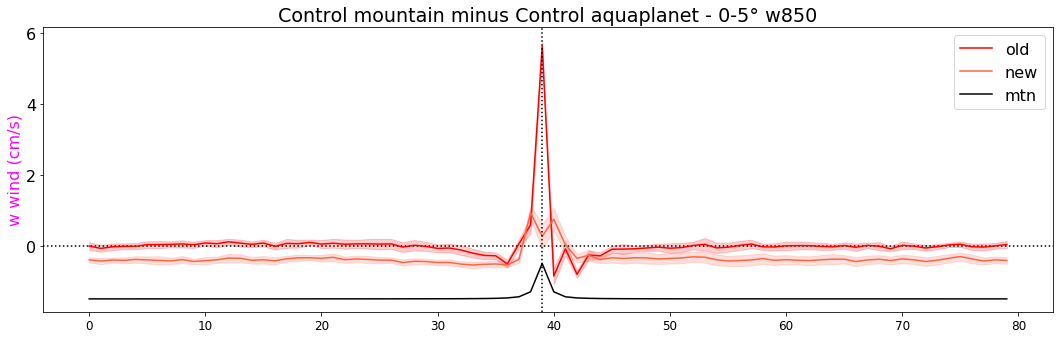

In [28]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° w850')

ax.axhline(0.,linestyle=':',color='k')
ax.plot(McontW.west_east,(McontW-AcontW)*100,'r',label='old')
ax.fill_between(McontW.west_east, (McontW-AcontW-McontW_std)*100, (McontW-AcontW+McontW_std)*100,
                 facecolor="r",
                 color="r",   
                 alpha=0.2)    
ax.plot(NMcontW.west_east,(NMcontW-AcontW)*100,'tomato',label='new')
ax.fill_between(NMcontW.west_east, (NMcontW-AcontW-NMcontW_std)*100, (NMcontW-AcontW+NMcontW_std)*100,
                 facecolor="tomato",
                 color="tomato",   
                 alpha=0.2)   
ax.set_ylabel('w wind (cm/s)', color='magenta')
#ax.set_ylim(-4.5,4.5)
ax.plot(hgt.west_east,hgt.sel(south_north=slice(0,4)).mean(["south_north"])/1000-1.5,color='k',label='mtn')
ax.axvline(39,linestyle=':',color='k')

    
matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
plt.legend()

## Seasonal

In [99]:
McontUs = [McontU_allt.isel(time=range(max(i,0),min(i+364,3800))).mean('time') for i in range(-30,3800,364)]
AcontUs = [AcontU_allt.isel(time=range(max(i,0),min(i+364,3790))).mean('time') for i in range(-30,3800,364)]
McontVs = [McontV_allt.isel(time=range(max(i,0),min(i+364,3800))).mean('time') for i in range(-30,3800,364)]
AcontVs = [AcontV_allt.isel(time=range(max(i,0),min(i+364,3790))).mean('time') for i in range(-30,3800,364)]

lbls=["DJF year 1",
      "MAM year 1",
      "JJA year 1",
      "SON year 1",
      "DJF year 2",
      "MAM year 2",
      "JJA year 2",
      "SON year 2",
      "DJF year 3",
      "MAM year 3",
      "JJA year 3",
     ]

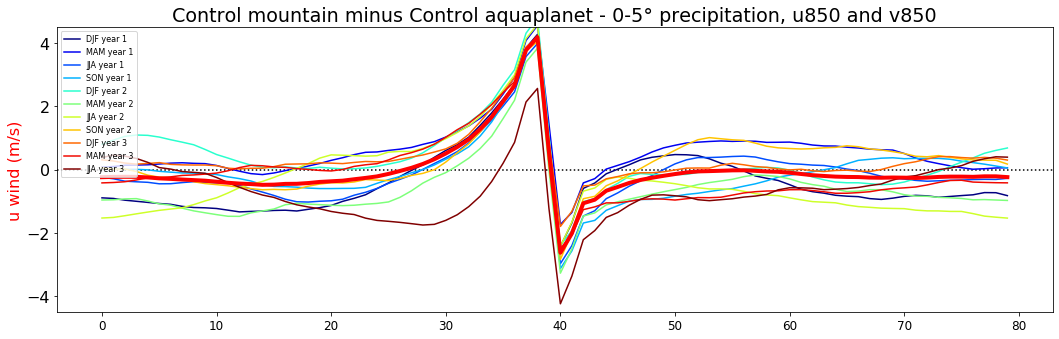

In [98]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° v850')
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax

ax2.set_ylabel('u wind (m/s)', color='r')
ax2.set_ylim(-4.5,4.5)
clrs=plt.cm.jet(np.linspace(0,1,11))
for i,(a,m) in enumerate(zip(AcontUs,McontUs)):
    ax2.plot(McontU.west_east,m-a,color = clrs[i],label = lbls[i]) 
ax2.plot(McontU.west_east,McontU-AcontU,'r',linewidth=4)     

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
ax2.legend(fontsize=8)

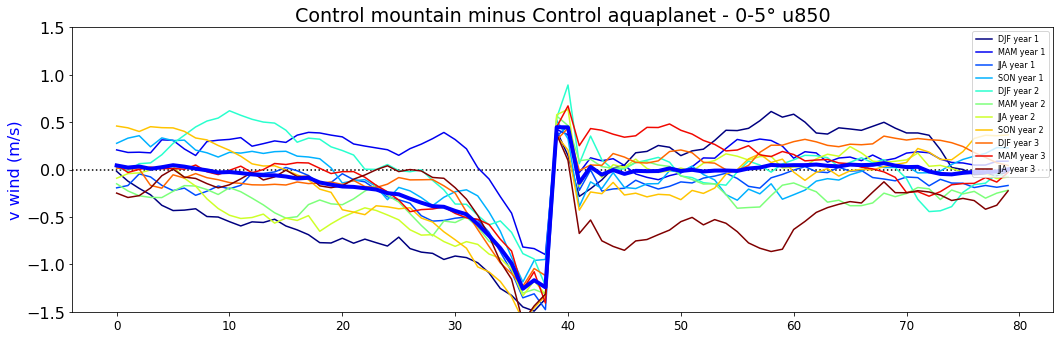

In [103]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Control mountain minus Control aquaplanet - 0-5° u850')
ax.axhline(0.,linestyle=':',color='k')
  
ax2=ax

ax2.set_ylabel('v wind (m/s)', color='b')
ax2.set_ylim(-1.5,1.5)
clrs=plt.cm.jet(np.linspace(0,1,11))
for i,(a,m) in enumerate(zip(AcontVs,McontVs)):
    ax2.plot(McontV.west_east,m-a,color = clrs[i],label = lbls[i]) 
ax2.plot(McontV.west_east,McontV-AcontV,'b',linewidth=4)     

matplotlib.rcParams.update({'font.size': 16})
ax.tick_params(axis = 'x', which = 'major', labelsize = 12)
fig.tight_layout()
ax2.legend(fontsize=8)

# 2D longitude/pressure plots

In [29]:
def plot_lon_lev(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax, x='west_east',yincrease=False)
    else :
        (Mcont-Acont).plot(ax=ax, x='west_east',yincrease=False,levels=lvls)
    ax.set_title(lbl)
   

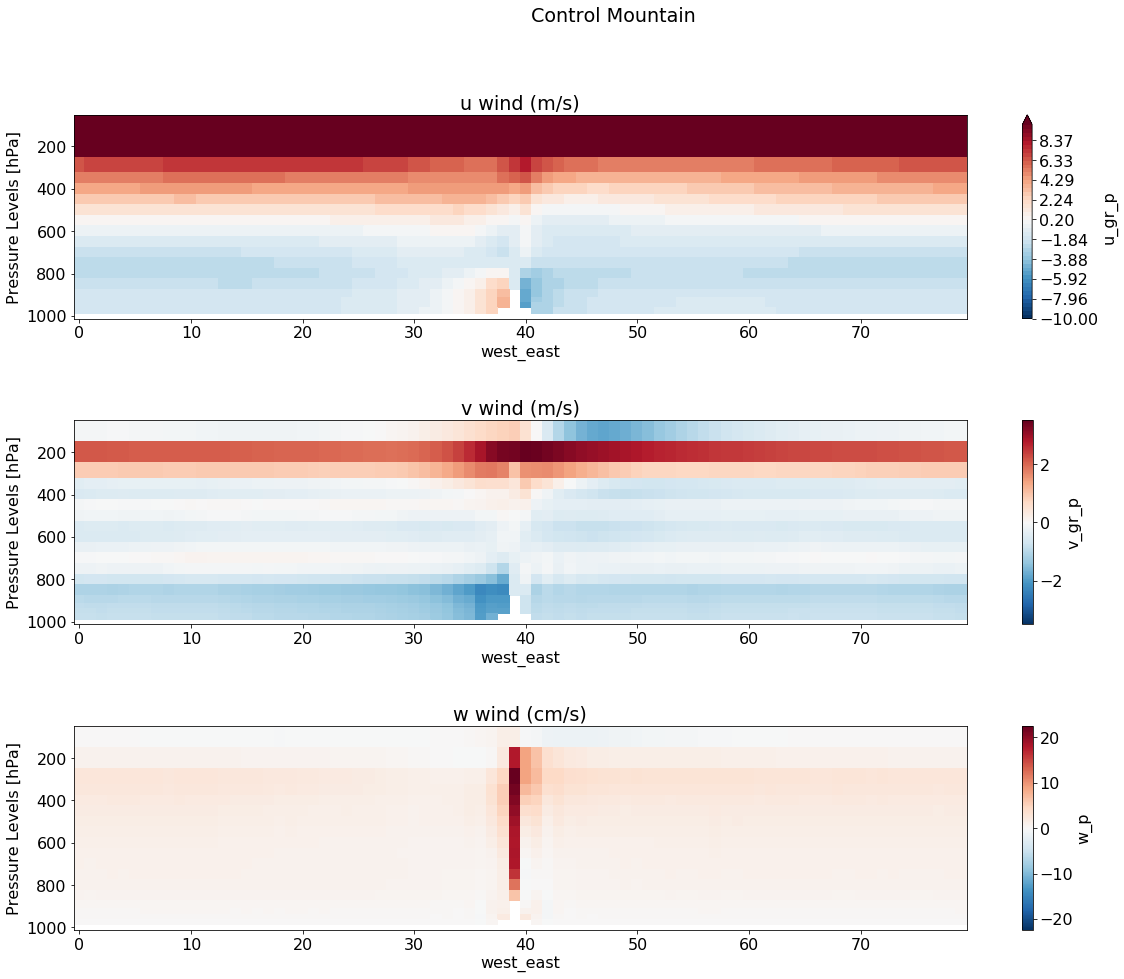

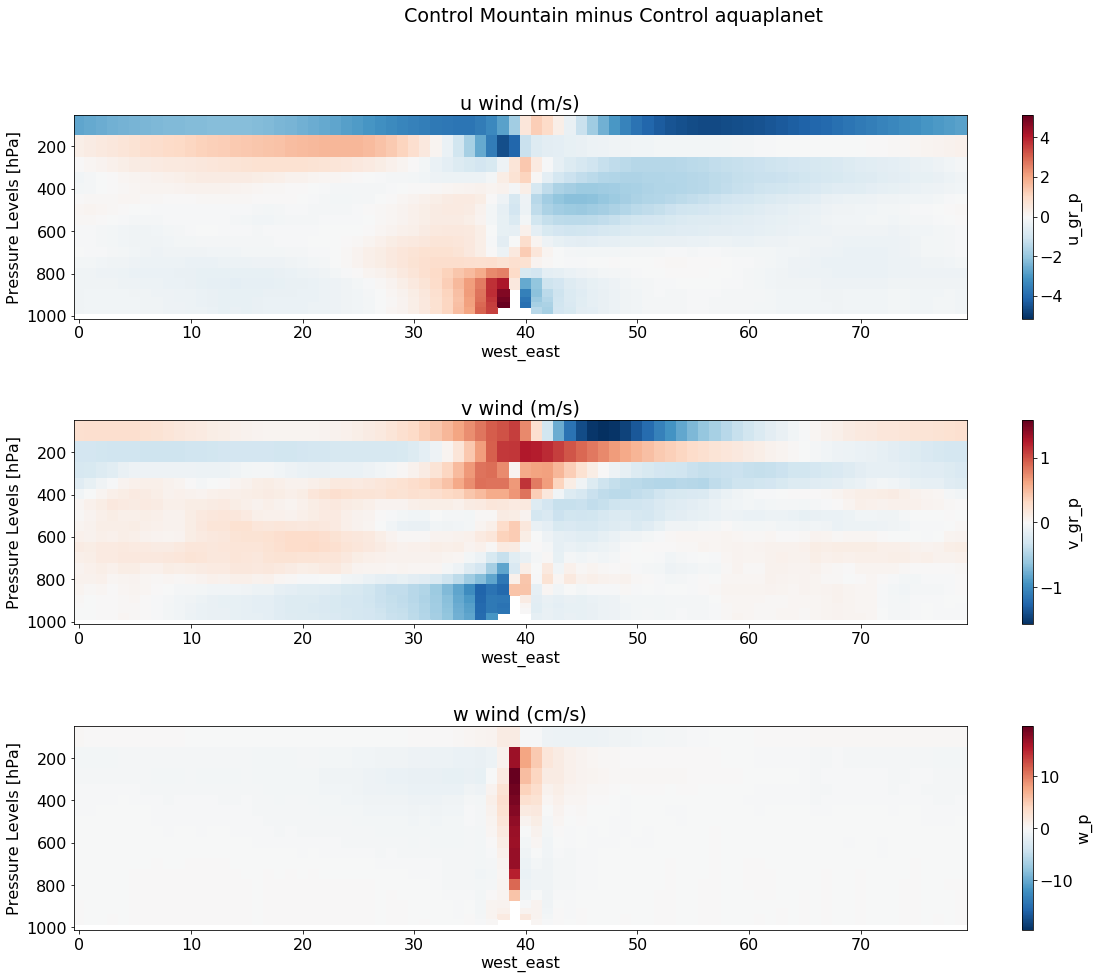

In [31]:
 
fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(McontU_alllevs,0.,ax[0],"u wind (m/s)",np.linspace(-10.,10.))
plot_lon_lev(McontV_alllevs,0.,ax[1],"v wind (m/s)")
plot_lon_lev(100*McontW_alllevs,0.,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain");None

#era5mf.plot(ax=ax[i][0], x='month',yincrease=False,cbar_kwargs={"label":"Mass flux (kg/m2/s)","ticks":np.arange(-lvls[i][1],lvls[i][1]+1e-6,lvls[i][2])},cmap=plt.cm.RdBu_r,levels=np.linspace(-lvls[i][0],lvls[i][0]))



fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(McontU_alllevs,AcontU_alllevs,ax[0],"u wind (m/s)")
plot_lon_lev(McontV_alllevs,AcontV_alllevs,ax[1],"v wind (m/s)")
plot_lon_lev(100*McontW_alllevs,100*AcontW_alllevs,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain minus Control aquaplanet");None

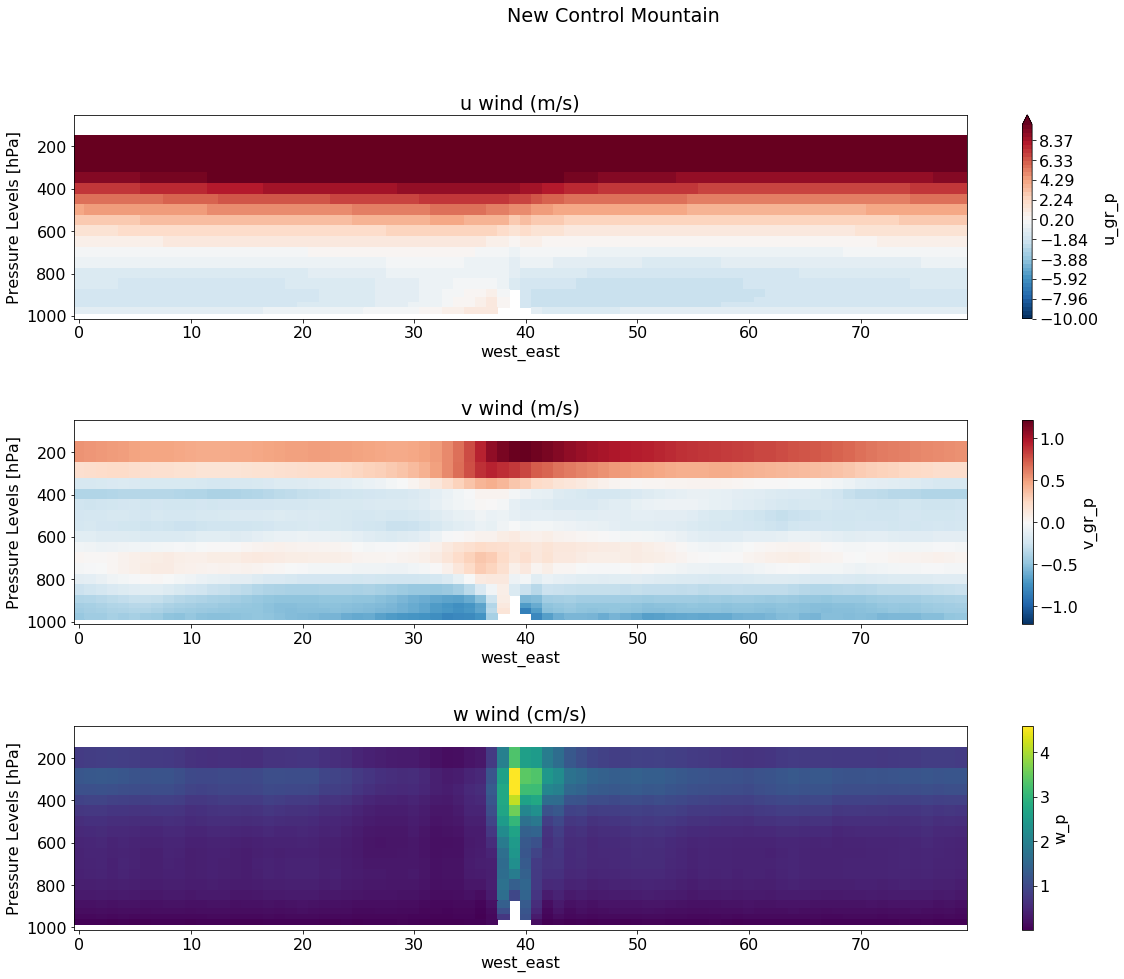

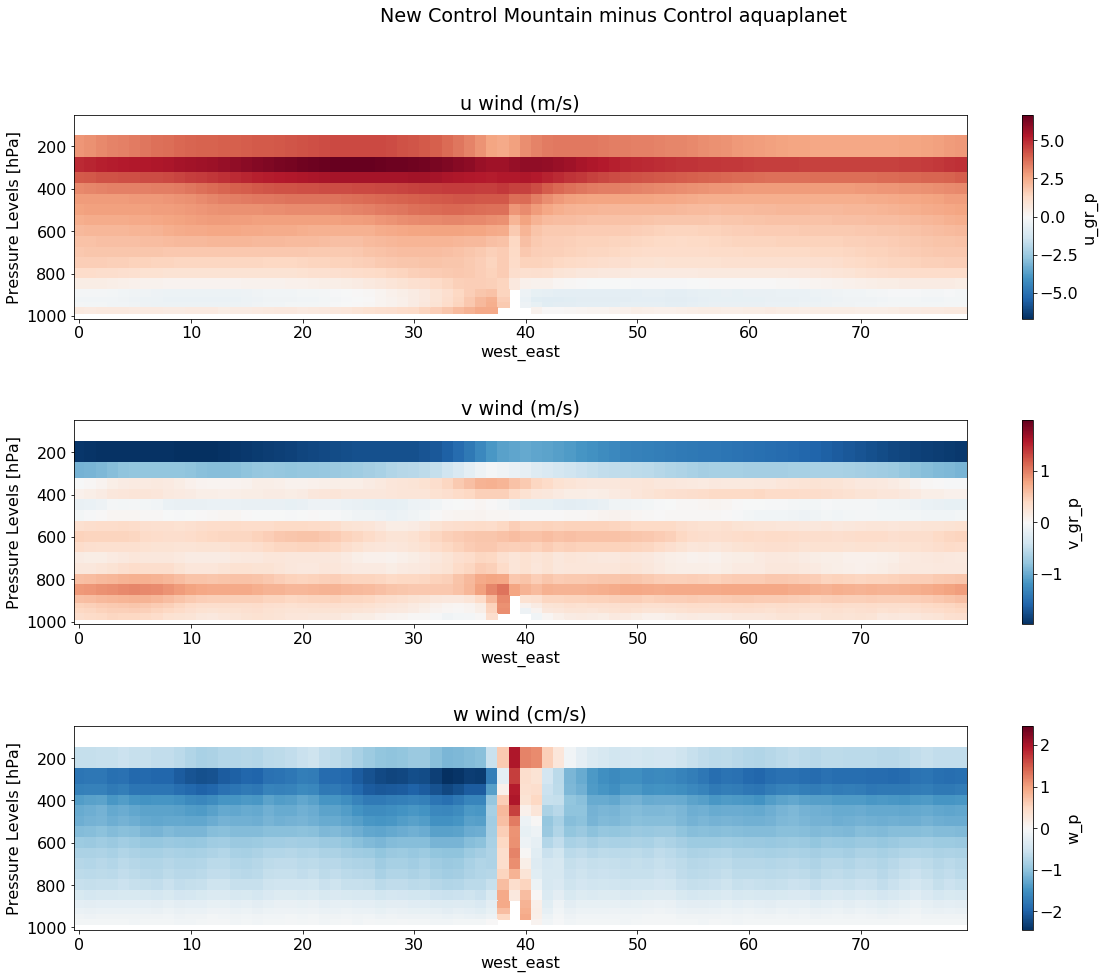

In [32]:
 
fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(NMcontU_alllevs,0.,ax[0],"u wind (m/s)",np.linspace(-10.,10.))
plot_lon_lev(NMcontV_alllevs,0.,ax[1],"v wind (m/s)")
plot_lon_lev(100*NMcontW_alllevs,0.,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("New Control Mountain");None

#era5mf.plot(ax=ax[i][0], x='month',yincrease=False,cbar_kwargs={"label":"Mass flux (kg/m2/s)","ticks":np.arange(-lvls[i][1],lvls[i][1]+1e-6,lvls[i][2])},cmap=plt.cm.RdBu_r,levels=np.linspace(-lvls[i][0],lvls[i][0]))



fig, ax = plt.subplots(3,1,figsize=(20,15))
plot_lon_lev(NMcontU_alllevs,AcontU_alllevs,ax[0],"u wind (m/s)")
plot_lon_lev(NMcontV_alllevs,AcontV_alllevs,ax[1],"v wind (m/s)")
plot_lon_lev(100*NMcontW_alllevs,100*AcontW_alllevs,ax[2],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("New Control Mountain minus Control aquaplanet");None

## Hadley circulation

In [33]:
t=time.time()
temp = NMcont.vars.u_gr_p.resample(time='5D').mean()
NMcontU_alllevs_alllats = temp.isel(time=range(10,len(temp.time))).mean(["time"]).compute()
NMcontU_alllevs_alllats.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/new.wrf.mountain.100km.1000d/diags/new.wrf.mountain.100km.1000d.u_gr_p_tmean.nc")
print(time.time()-t)
t=time.time()
temp = NMcont.vars.v_gr_p.resample(time='5D').mean()
NMcontV_alllevs_alllats = temp.isel(time=range(10,len(temp.time))).mean(["time"]).compute()
NMcontV_alllevs_alllats.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/new.wrf.mountain.100km.1000d/diags/new.wrf.mountain.100km.1000d.v_gr_p_tmean.nc")
print(time.time()-t)
t=time.time()
temp = NMcont.vars.w_p.resample(time='5D').mean()
NMcontW_alllevs_alllats = temp.isel(time=range(10,len(temp.time))).mean(["time"]).compute()
NMcontW_alllevs_alllats.to_netcdf("/global/cscratch1/sd/qnicolas/wrfdata/processed/new.wrf.mountain.100km.1000d/diags/new.wrf.mountain.100km.1000d.w_p_tmean.nc")
print(time.time()-t)

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


28.12752890586853


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


11.64156198501587


/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/resample.py:176: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, the dimension order of these coordinates will be restored as well unless you specify restore_coord_dims=False.
  super().__init__(*args, **kwargs)
/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


11.979745864868164


In [34]:
McontU_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.u_gr_p_tmean.nc").u_gr_p
McontV_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.v_gr_p_tmean.nc").v_gr_p
McontW_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.mountain.100km.1000d/diags/wrf.mountain.100km.1000d.w_p_tmean.nc").w_p

AcontU_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.u_gr_p_tmean.nc").u_gr_p
AcontV_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.v_gr_p_tmean.nc").v_gr_p
AcontW_alllevs_alllats = xr.open_dataset("/global/cscratch1/sd/qnicolas/wrfdata/processed/wrf.aquaplanet.100km.1000d/diags/wrf.aquaplanet.100km.1000d.w_p_tmean.nc").w_p


In [35]:
def plot_lat_lev(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax, x='south_north',yincrease=False)
    else :
        (Mcont-Acont).plot(ax=ax, x='south_north',yincrease=False,levels=lvls)
    ax.set_title(lbl)
    

/global/homes/q/qnicolas/.conda/envs/era5/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


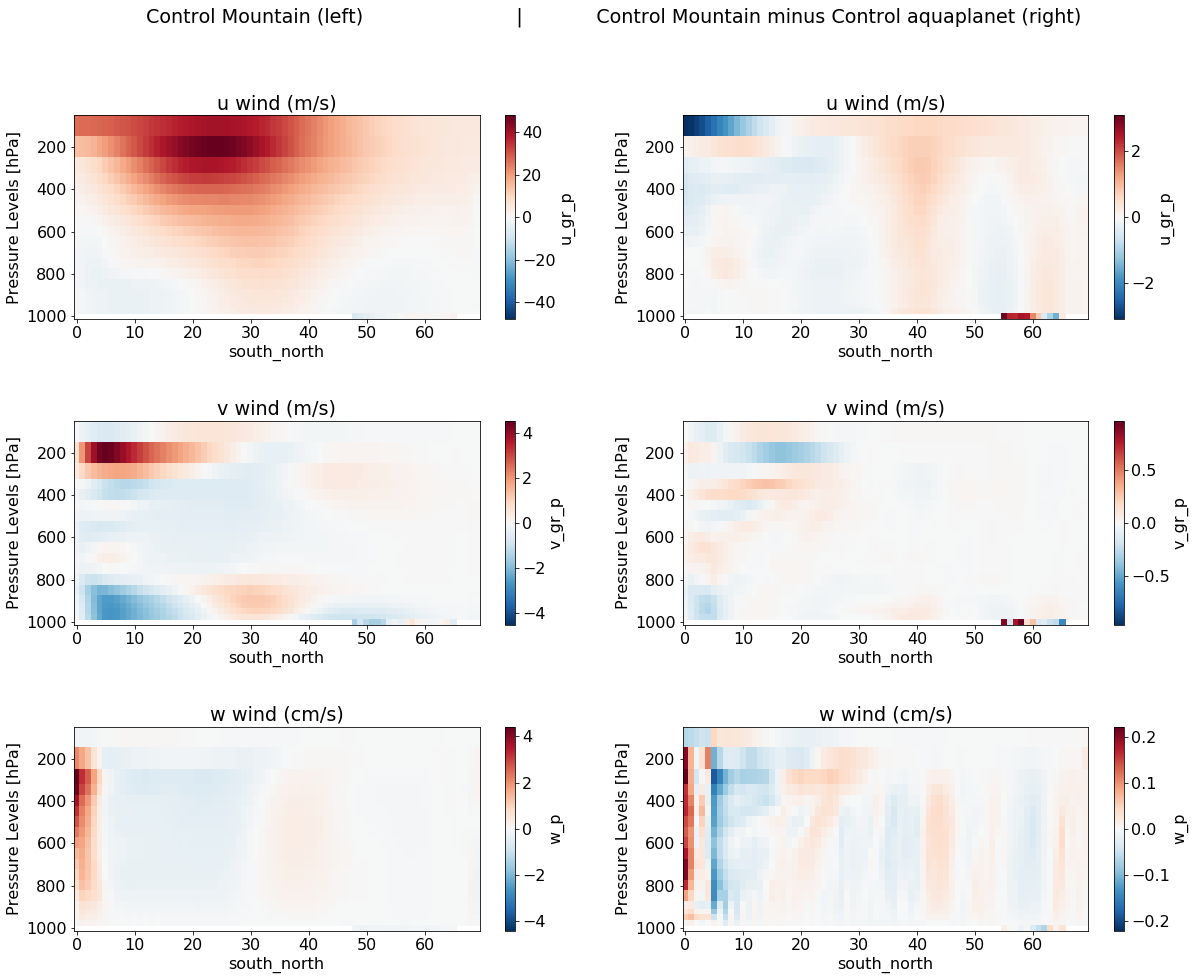

In [36]:
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lev(McontU_alllevs_alllats.mean("west_east"),0.,ax[0][0],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev(McontV_alllevs_alllats.mean("west_east"),0.,ax[1][0],"v wind (m/s)")
plot_lat_lev(100*McontW_alllevs_alllats.mean("west_east"),0.,ax[2][0],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lev(McontU_alllevs_alllats.mean("west_east"),AcontU_alllevs_alllats.mean("west_east"),ax[0][1],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev(McontV_alllevs_alllats.mean("west_east"),AcontV_alllevs_alllats.mean("west_east"),ax[1][1],"v wind (m/s)")
plot_lat_lev(100*McontW_alllevs_alllats.mean("west_east"),100*AcontW_alllevs_alllats.mean("west_east"),ax[2][1],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None

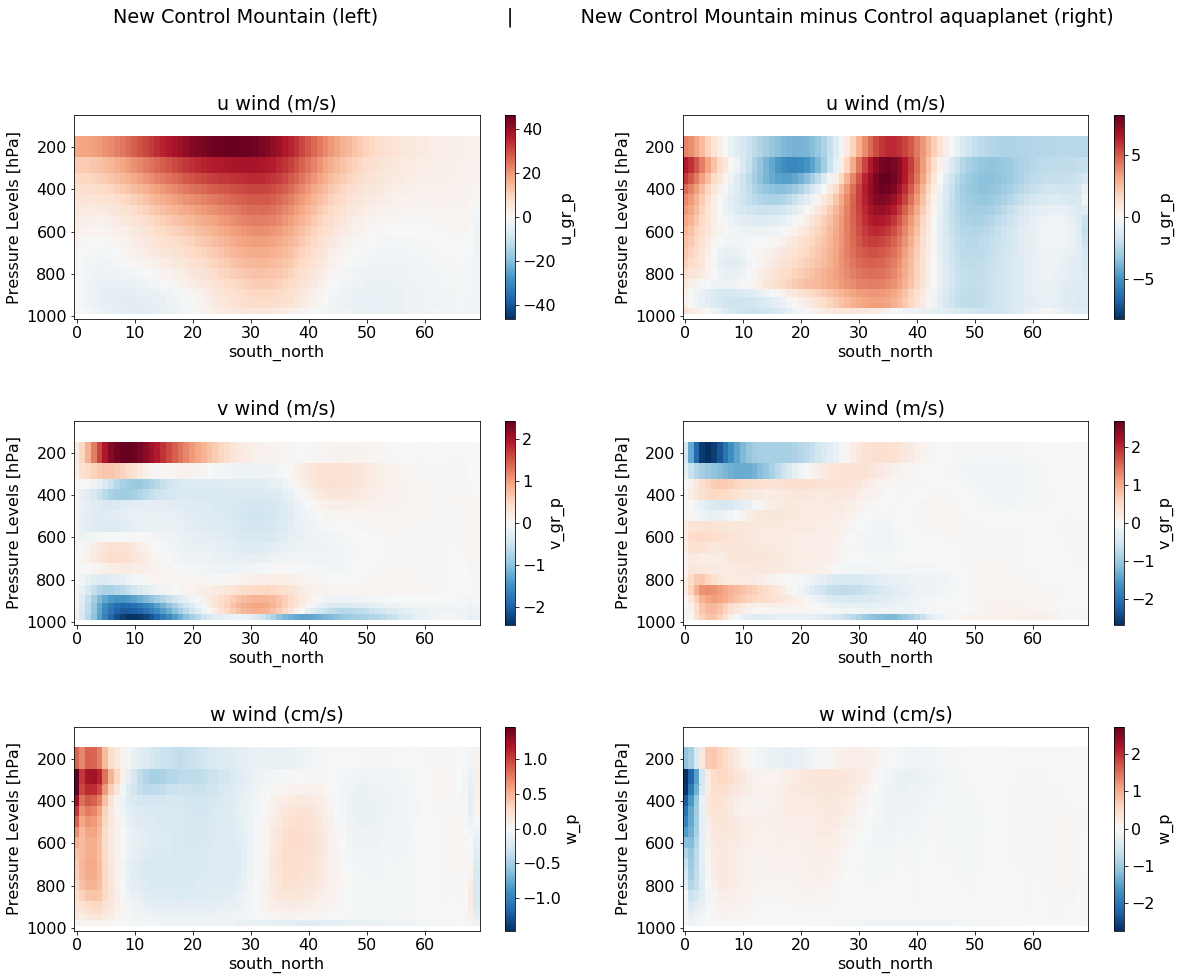

In [37]:
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lev(NMcontU_alllevs_alllats.mean("west_east"),0.,ax[0][0],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev(NMcontV_alllevs_alllats.mean("west_east"),0.,ax[1][0],"v wind (m/s)")
plot_lat_lev(100*NMcontW_alllevs_alllats.mean("west_east"),0.,ax[2][0],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lev(NMcontU_alllevs_alllats.mean("west_east"),AcontU_alllevs_alllats.mean("west_east"),ax[0][1],"u wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lev(NMcontV_alllevs_alllats.mean("west_east"),AcontV_alllevs_alllats.mean("west_east"),ax[1][1],"v wind (m/s)")
plot_lat_lev(100*NMcontW_alllevs_alllats.mean("west_east"),100*AcontW_alllevs_alllats.mean("west_east"),ax[2][1],"w wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
fig.suptitle("New Control Mountain (left)                     |           New Control Mountain minus Control aquaplanet (right)");None

In [11]:
def plot_lat_lon(Mcont,Acont,ax,lbl,lvls=[]):
    if len(lvls)==0 :
        (Mcont-Acont).plot(ax=ax)
    else :
        (Mcont-Acont).plot(ax=ax,levels=lvls)
    ax.set_title(lbl)
  

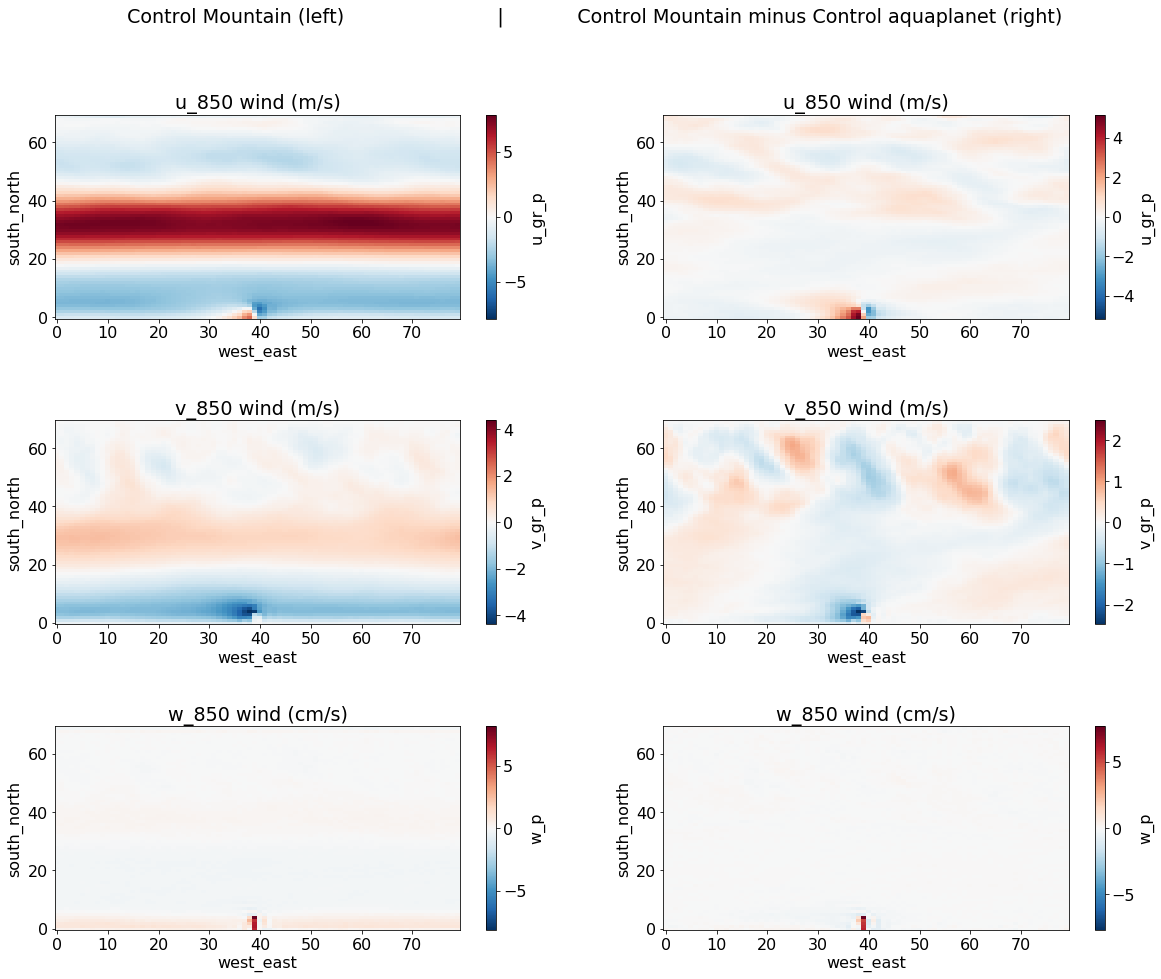

In [88]:
  
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lon(McontU_alllevs_alllats.sel(level=850.),0.,    ax[0][0],"u_850 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=850.),0.,    ax[1][0],"v_850 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=850.),0.,ax[2][0],"w_850 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lon(McontU_alllevs_alllats.sel(level=850.),AcontU_alllevs_alllats.sel(level=850.),        ax[0][1],"u_850 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=850.),AcontV_alllevs_alllats.sel(level=850.),        ax[1][1],"v_850 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=850.),100*AcontW_alllevs_alllats.sel(level=850.),ax[2][1],"w_850 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None

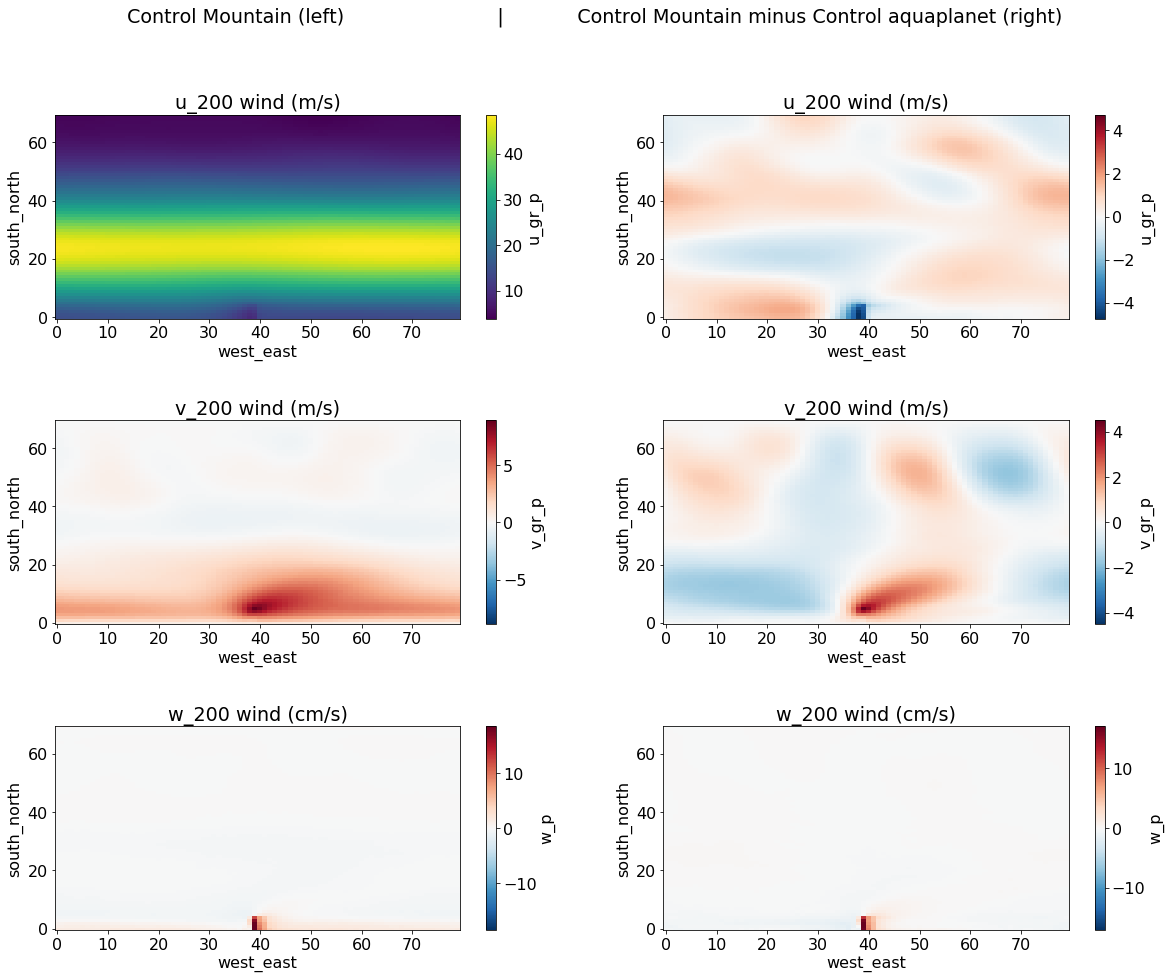

In [16]:
matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(3,2,figsize=(20,15))
plot_lat_lon(McontU_alllevs_alllats.sel(level=200.),0.,    ax[0][0],"u_200 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=200.),0.,    ax[1][0],"v_200 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=200.),0.,ax[2][0],"w_200 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)

plot_lat_lon(McontU_alllevs_alllats.sel(level=200.),AcontU_alllevs_alllats.sel(level=200.),        ax[0][1],"u_200 wind (m/s)")#,np.linspace(-10.,10.))
plot_lat_lon(McontV_alllevs_alllats.sel(level=200.),AcontV_alllevs_alllats.sel(level=200.),        ax[1][1],"v_200 wind (m/s)")
plot_lat_lon(100*McontW_alllevs_alllats.sel(level=200.),100*AcontW_alllevs_alllats.sel(level=200.),ax[2][1],"w_200 wind (cm/s)")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Control Mountain (left)                         |            Control Mountain minus Control aquaplanet (right)");None
